In [136]:
!pip install dlib

In [137]:
import os

In [138]:
import sys

In [139]:
import glob

In [140]:
import dlib

In [141]:
options = dlib.shape_predictor_training_options()

In [142]:
options.oversampling_amount = 10

In [143]:
options.nu = 0.05

In [153]:
options.tree_depth = 4

In [154]:
options.be_verbose = True

In [155]:
training_xml_path = os.path.join('', "training.xml")


In [156]:
dlib.train_shape_predictor(training_xml_path, "predictor.dat", options)

In [157]:
print("\nTraining accuracy: {}".format(
    dlib.test_shape_predictor(training_xml_path, "predictor.dat")))



Training accuracy: 0.4943385176652097


In [158]:
predictor = dlib.shape_predictor("predictor.dat")

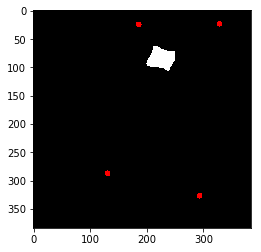

In [168]:
img = cv2.imread('generated_masks/MR_0021_L_1.png')
# plt.imshow(img)
shape = predictor(img, dlib.rectangle(0, 0, 320, 320))
for p in range(0, 6):
    x, y = shape.part(p).x, shape.part(p).y
    cv2.circle(img, (x, y), 5, 255, -1)
plt.imshow(img)

In [13]:
import numpy as np   
import matplotlib.pyplot as plt

In [14]:
import cv2

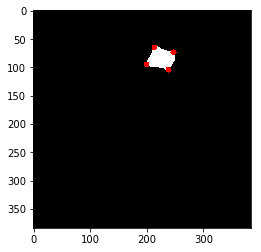

In [152]:
img = cv2.imread('generated_masks/MR_0021_L_1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
gray = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 10)

corners = np.int0(corners)

for c in corners:
    x, y = c.ravel()
    cv2.circle(img, (x, y), 5, 255, -1)
plt.imshow(img)

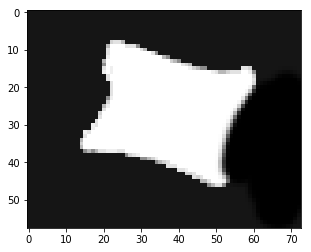

In [170]:
im = cv2.imread('test_mask/test2.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im, contours, -1, (0, 255, 0), 1)
plt.imshow(im)

77
[-90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]


(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,
         9.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([-90. , -76.5, -63. , -49.5, -36. , -22.5,  -9. ,   4.5,  18. ,
         31.5,  45. ,  58.5,  72. ,  85.5,  99. , 112.5, 126. , 139.5,
        153. , 166.5, 180. ]),
 <a list of 20 Patch objects>)

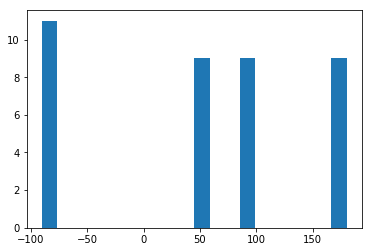

In [171]:
angles = []
prev = []
print(len(contours[0]))
for idx, c in enumerate(contours[0]):
    x, y = c[0][0], c[0][1]
    if idx > 0 and idx % 2 == 0:
        angle = np.arctan2(prev[idx-1][1] - y, prev[idx-1][0] - x) * 180.0 / np.pi
        angles.append(angle)
    prev.append((x, y))
print(angles)
plt.hist(angles, bins=20)

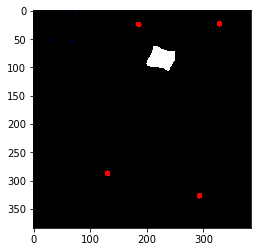

In [172]:
pred = predictor(img, dlib.rectangle(0, 0, 72, 57))
pts = []
for p in range(0, 6):
    pt = pred.part(p)
    x, y = pt.x, pt.y
    cv2.circle(img, (x, y), 1, (0, 0, 255))
plt.imshow(img)